# Importing Data

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep
from coffea.util import load
import numpy as np
import pandas as pd
import awkward as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from numba import njit
import vector
vector.register_numba()
vector.register_awkward()


from pprint import pprint 
hep.style.use(hep.style.ROOT)

import hist

In [4]:
df = ak.from_parquet("/eos/user/d/dvalsecc/www/ttHbbAnalysis/training_dataset/all_jets_v6.parquet")

In [5]:
(jets,
partons_matched,
partons,
generator_info,
lepton_partons,
lepton_reco, 
met
) = ak.unzip(df)

jets = ak.with_name(jets, name="Momentum4D")
partons_matched = ak.with_name(partons_matched, name="Momentum4D")
partons = ak.with_name(partons, name="Momentum4D")
lepton_partons = ak.with_name(lepton_partons, name="Momentum4D")
lepton_reco = ak.with_name(lepton_reco, name="Momentum4D")
met = ak.with_name(met, name="Momentum4D")

# Exercise Plots

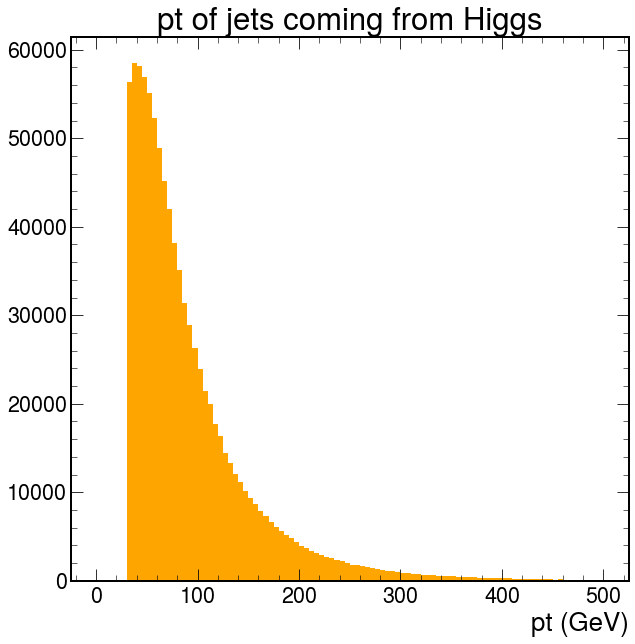

In [113]:
#find jets with provenance 1
prov1_jets = jets[jets.prov == 1]

#plot the transverse momenta of these jets
plt.hist(ak.flatten(prov1_jets.pt), bins=100, range=(0, 500), color="orange")
plt.title("pt of jets coming from Higgs")
plt.xlabel("pt (GeV)")
plt.savefig("/eos/user/m/mamantov/ttHbb_jets_partons_studies/Plots/Exercise Plots/pt_from_higgs.png")
plt.show()

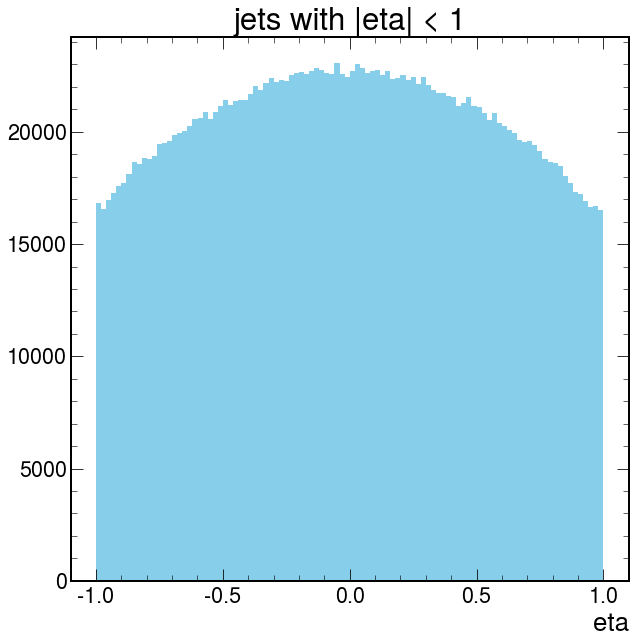

In [114]:
#find jets with |eta|<1
smalleta_jets = jets[np.abs(jets.eta) < 1.0]

#plot the eta of these jets
plt.hist(ak.flatten(smalleta_jets.eta), bins=100, color="skyblue")
plt.xlabel("eta")
plt.title("jets with |eta| < 1")
plt.savefig("/eos/user/m/mamantov/ttHbb_jets_partons_studies/Plots/Exercise Plots/small_eta_jets.png")
plt.show()

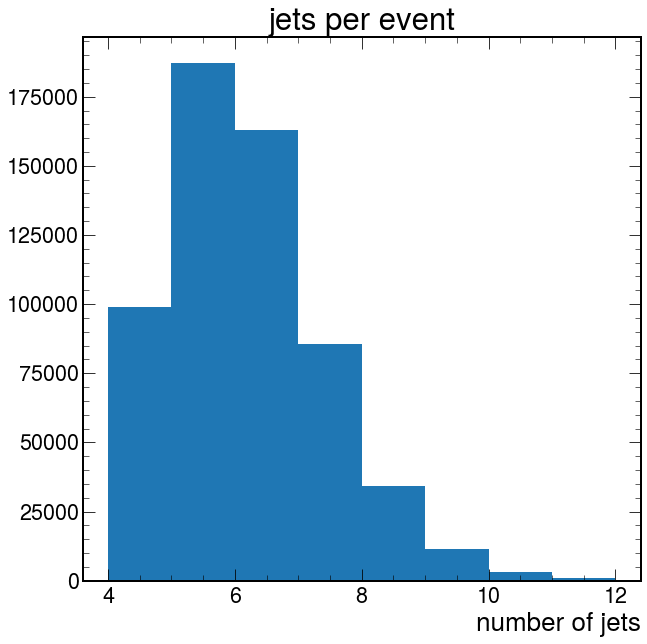

In [115]:
#count number of jets per event
jetnum = ak.num(jets.pt, axis=1)
plt.hist(jetnum, bins=8, range=(4,12))
plt.title("jets per event")
plt.xlabel("number of jets")
plt.savefig("/eos/user/m/mamantov/ttHbb_jets_partons_studies/Plots/Exercise Plots/jets_per_event")
plt.show()

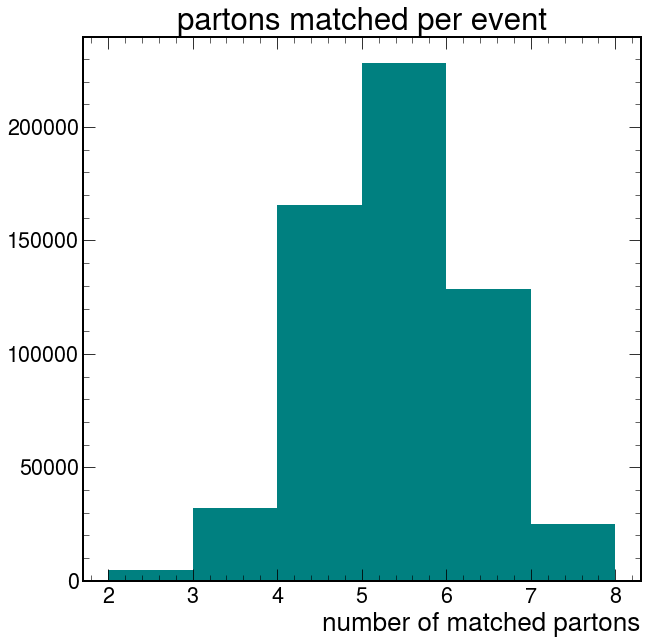

In [116]:
#count number of matched partons per event
partons_knownprov = partons_matched[jets.prov != -1]
matchednum = ak.num(partons_knownprov.prov, axis=1)
plt.hist(matchednum, bins=6, range=(2,8), color="teal")
plt.title("partons matched per event")
plt.xlabel("number of matched partons")
plt.savefig("/eos/user/m/mamantov/ttHbb_jets_partons_studies/Plots/Exercise Plots/matched_partons_per_event")
plt.show()

In [117]:
#count number of events with 2 matched jets coming from higgs (prov = 1)
jets_higgs = jets[jets.prov == 1]
jets_2higgs = jets_higgs[ak.num(jets_higgs.pt, axis=1) == 2]
eventnum_2higgs = ak.num(jets_2higgs.pt, axis=0)
eventnum_2higgs

350930

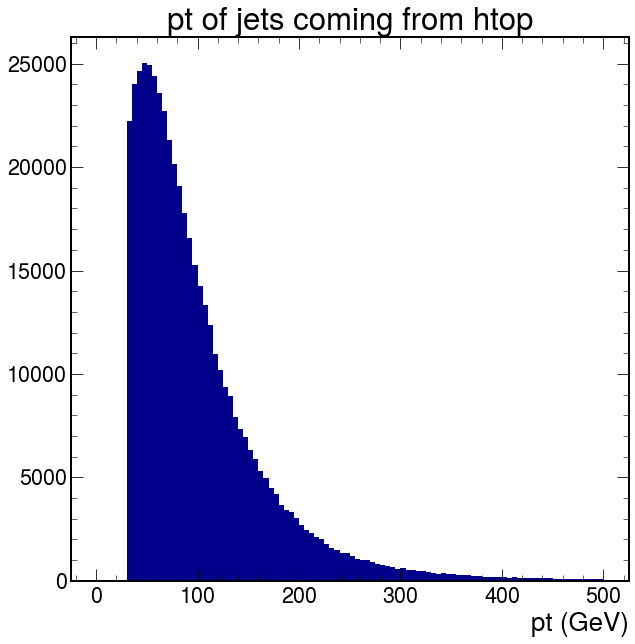

In [118]:
#find jets coming from hadronic top (prov = 2)
jets_htop = jets[jets.prov == 2]

#plot pt of these jets
plt.hist(ak.flatten(jets_htop.pt), bins=100, color="darkblue", range=(0,500))
plt.title("pt of jets coming from htop")
plt.xlabel("pt (GeV)")
plt.savefig("/eos/user/m/mamantov/ttHbb_jets_partons_studies/Plots/Exercise Plots/pt_from_htop")
plt.show()

# Invariant Mass

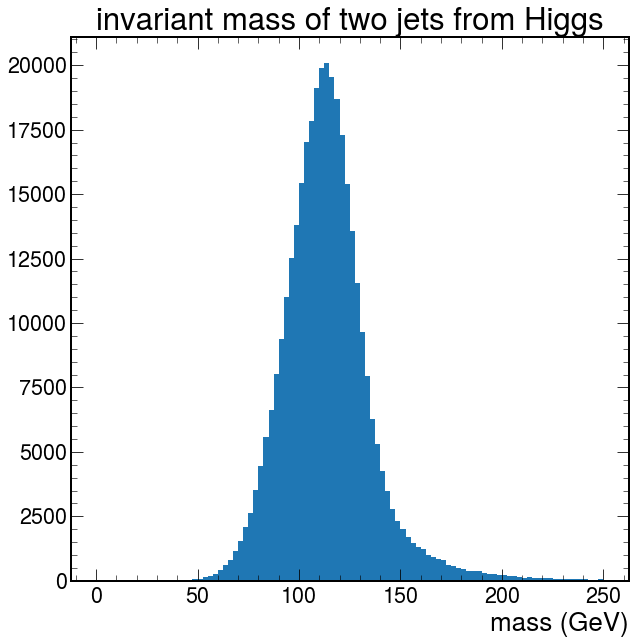

In [119]:
#invariant mass of two jets coming from higgs
summed_jets_higgs = jets_2higgs[:,0] + jets_2higgs[:,1]
plt.hist(summed_jets_higgs.mass, bins=100, range=(0,250))
plt.title("invariant mass of two jets from Higgs")
plt.xlabel("mass (GeV)")
plt.savefig("/eos/user/m/mamantov/ttHbb_jets_partons_studies/Plots/Invariant Mass/higgs_invariant_mass")
plt.show()

In [120]:
def generate_summed(jets, partons, prov):
    jets_prov = jets[jets.prov == prov]
    jets_2prov = jets_prov[ak.num(jets_prov.pt, axis=1) == 2]
    summed_jets_prov = jets_2prov[:,0] + jets_2prov[:,1]
    
    partons_prov = partons[jets.prov == prov]
    partons_2prov = partons_prov[ak.num(partons_prov.pt, axis=1) == 2]
    summed_partons_prov = partons_2prov[:,0] + partons_2prov[:,1]
    return summed_jets_prov, summed_partons_prov

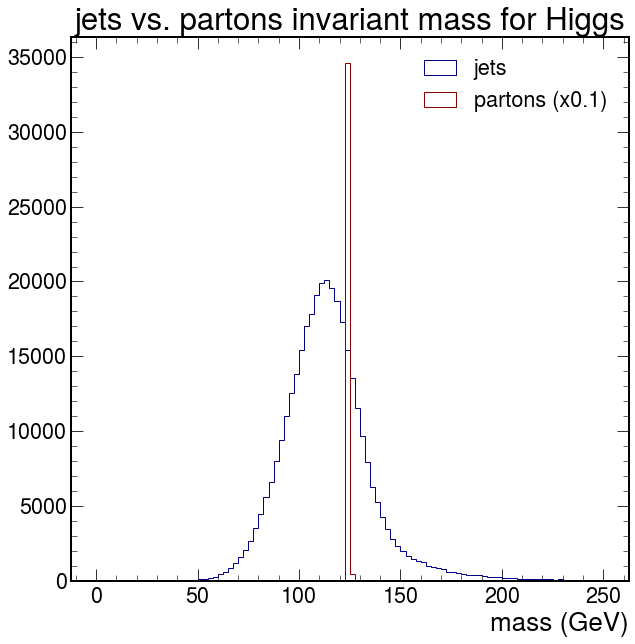

In [121]:
#invariant mass of the sum of the two jets associated with the Higgs
summed_jets_higgs, summed_partons_higgs = generate_summed(jets, partons_matched, 1)
plt.hist(summed_jets_higgs.mass, bins=100, range=(0,250), color="darkblue", histtype="step", label="jets")

#invariant mass of the sum of the two partons associated with the Higgs
plt.hist(summed_partons_higgs.mass, bins=100, weights=0.1*np.ones_like(summed_partons_higgs.mass), range=(0,250), color="darkred", histtype="step", label="partons (x0.1)")
plt.title("jets vs. partons invariant mass for Higgs")
plt.legend()
plt.xlabel("mass (GeV)")
plt.savefig("/eos/user/m/mamantov/ttHbb_jets_partons_studies/Plots/Invariant Mass/jets_vs_partons_higgs")
plt.show()

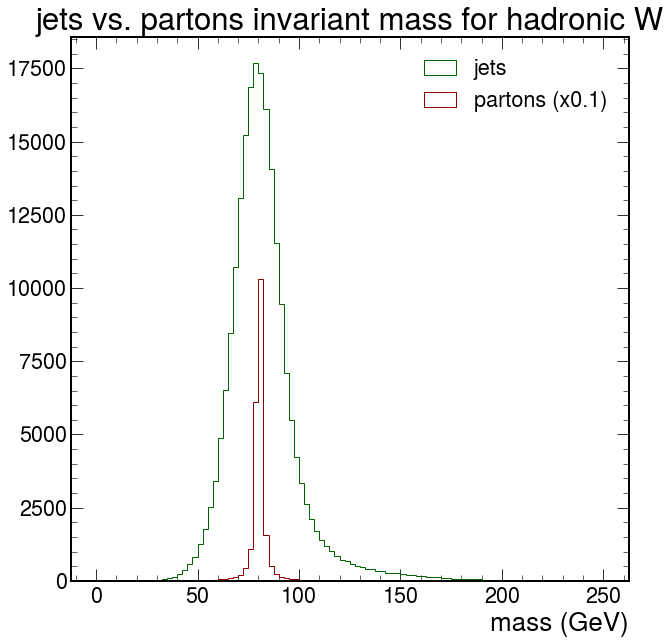

In [128]:
#invariant mass of the sum of the two jets associatied with the hadronically decaying W boson (prov = 5)

summed_jets_W, summed_partons_W = generate_summed(jets, partons_matched, 5)
plt.hist(summed_jets_W.mass, bins=100, range=(0,250), color="darkgreen", label=("jets"), histtype="step")

#invariant mass of the sum of the two partons associatied with the hadronically decaying W boson (prov = 5)
plt.hist(summed_partons_W.mass, weights=0.1*np.ones_like(summed_partons_W.mass), bins=100, range=(0,250), color="darkred", label=("partons (x0.1)"), histtype="step")
plt.title("jets vs. partons invariant mass for hadronic W")
plt.xlabel("mass (GeV)")
plt.legend()
plt.savefig("/eos/user/m/mamantov/ttHbb_jets_partons_studies/Plots/Invariant Mass/jets_vs_partons_W")
plt.show()


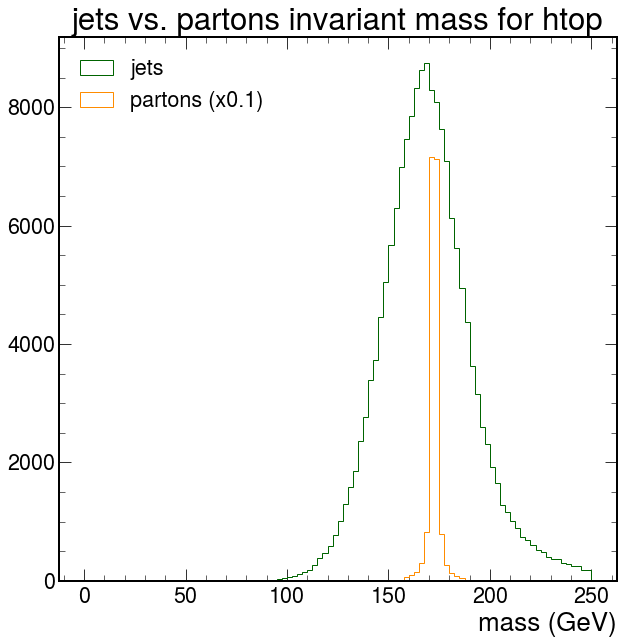

In [134]:
#invariant mass of top hadronically decaying
jets_with_2W = jets[ak.sum(jets.prov == 5, axis=1) == 2]
jets_with_1htop2W = jets_with_2W[ak.sum(jets_with_2W.prov == 2, axis=1) == 1]

partons_with_2W = partons_matched[ak.sum(jets.prov == 5, axis=1) == 2]
partons_with_1htop2W = partons_with_2W[ak.sum(jets_with_2W.prov == 2, axis=1) == 1]

summed_jets_W, summed_partons_W = generate_summed(jets_with_1htop2W, partons_with_1htop2W, 5)

jets_htop = jets_with_1htop2W[jets_with_1htop2W.prov == 2]
jets_1htop = jets_htop[ak.num(jets_htop.pt, axis=1) == 1]
summed_jets_htop = jets_1htop
    
partons_htop = partons_with_1htop2W[jets_with_1htop2W.prov == 2]
partons_1htop = partons_htop[ak.num(partons_htop.pt, axis=1) == 1]
summed_partons_htop = partons_1htop

total_sum_jets = summed_jets_W + summed_jets_htop
total_sum_partons = summed_partons_W + summed_partons_htop

plt.hist(total_sum_jets.mass, bins=100, range=(0,250), color="darkgreen", label="jets", histtype="step")
plt.hist(total_sum_partons.mass, weights=0.1*np.ones_like(total_sum_partons.mass), bins=100, range=(0,250), color="darkorange", label="partons (x0.1)", histtype="step")
plt.title("jets vs. partons invariant mass for htop")
plt.legend(loc="upper left")
plt.xlabel("mass (GeV)")
plt.savefig("/eos/user/m/mamantov/ttHbb_jets_partons_studies/Plots/Invariant Mass/jets_vs_partons_htop")
plt.show()

# Higgs Correlations

In [ ]:
#selects events which include a given provenance (particle) with a certain multiplicity.
#provs: array of provenances;   mults: corresponding multiplicities
def select_include(jets, partons, provs, mults):
    new_jets = jets
    new_partons = partons
    for (prov, mult) in zip(provs, mults):
        if mult == -1:
            mask = (ak.sum(new_jets.prov == prov, axis=1) != 0)
            new_jets = new_jets[mask]
            new_partons = new_partons[mask]
        else:
            mask = (ak.sum(new_jets.prov == prov, axis=1) == mult)
            new_jets = new_jets[mask]
            new_partons = new_partons[mask]
    return new_jets, new_partons

#selects only those jets/partons of a given provenance (particle)
def select_only(jets, partons, prov):
    new_jets = jets[jets.prov == prov]
    new_partons = partons[jets.prov == prov]
    return new_jets, new_partons


In [ ]:
#previous example with new functions
jets_with_2higgs1htop, partons_with_2higgs1htop = select_include(jets, partons_matched, [1, 2], [2, 1])
higgs_jets, higgs_partons = select_only(jets_with_2higgs1htop, partons_with_2higgs1htop, 1)
htop_jets, htop_partons = select_only(jets_with_2higgs1htop, partons_with_2higgs1htop, 2)
higgs_pt = ak.sum(higgs_jets.pt, axis=1)
htop_pt = ak.sum(htop_jets.pt, axis=1)

plt.hist2d(higgs_pt, htop_pt, bins=(150,150), range=[[20, 250], [20, 250]])
plt.show()

In [ ]:
#eta of higgs vs eta of partons
higgs_jets, higgs_partons = select_only(jets, partons_matched, 1)
jet_eta = higgs_jets.eta
parton_eta = higgs_partons.eta
jet_eta = ak.flatten(jet_eta)
parton_eta = ak.flatten(parton_eta)

plt.hist2d(parton_eta, jet_eta, bins=(200,200), cmap="inferno")
plt.show()

# Boost

In [6]:
@njit
def sum_vectors_all(arrays):
    size = len(arrays)
    results = np.zeros((size, 4))
    for i, array in enumerate(arrays):
        total = vector.obj(px=0.0, py=0.0, pz=0.0, E=0.0)
        for v in array:
            total = total + v
        results[i, 0] = total.px
        results[i, 1] = total.py
        results[i, 2] = total.pz
        results[i, 3] = total.E
    return results


def get_vector_sum(vectors):
    out = sum_vectors_all(vectors)
    return vector.awk({
        "px": out[:, 0],
        "py": out[:, 1],
        "pz": out[:, 2],
        "E": out[:, 3],
    })

In [7]:
boost_jets = get_vector_sum(jets)
boost_reco = boost_jets + lepton_reco + met

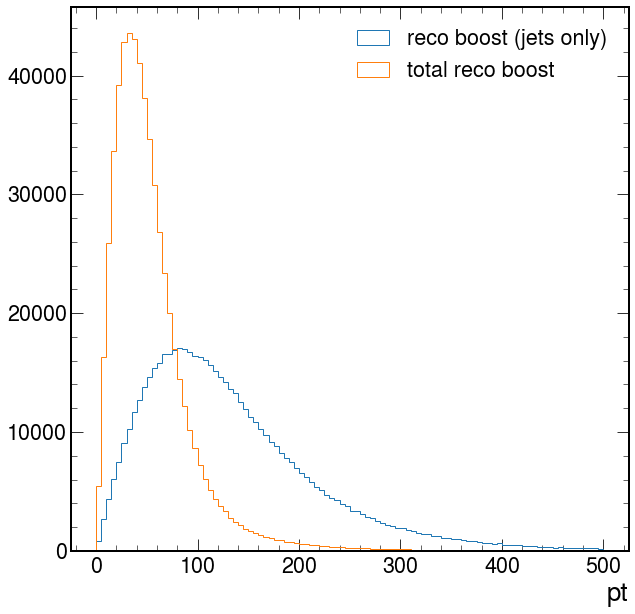

In [8]:
plt.hist(boost_jets.pt, bins=100, label="reco boost (jets only)", range=(0, 500), histtype="step")
plt.hist(boost_reco.pt, bins=100, label="total reco boost",range=(0, 500), histtype="step")
plt.xlabel("pt")
plt.legend()
plt.show()

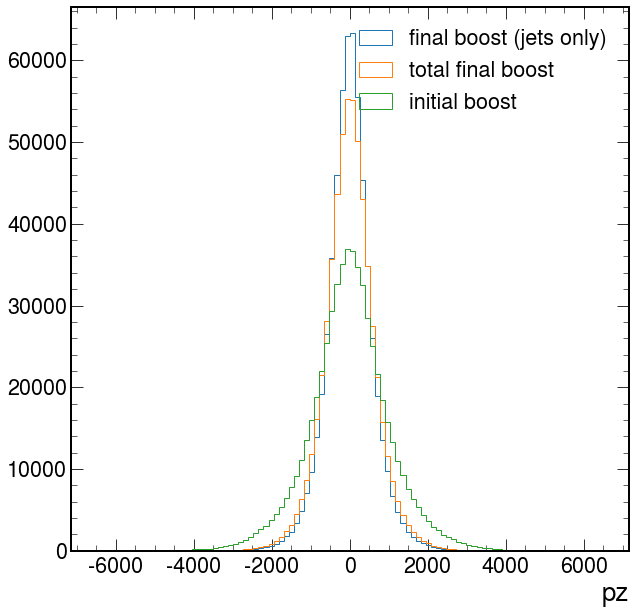

In [9]:
plt.hist(boost_jets.pz, bins=100, label="final boost (jets only)", range=(-6500, 6500), histtype="step")
plt.hist(boost_reco.pz, bins=100, label="total final boost",range=(-6500, 6500), histtype="step")
plt.hist(generator_info.x1 * 6500 - generator_info.x2 * 6500, bins=100, label="initial boost",range=(-6500, 6500), histtype="step" )
plt.legend()
plt.xlabel("pz")
plt.show()

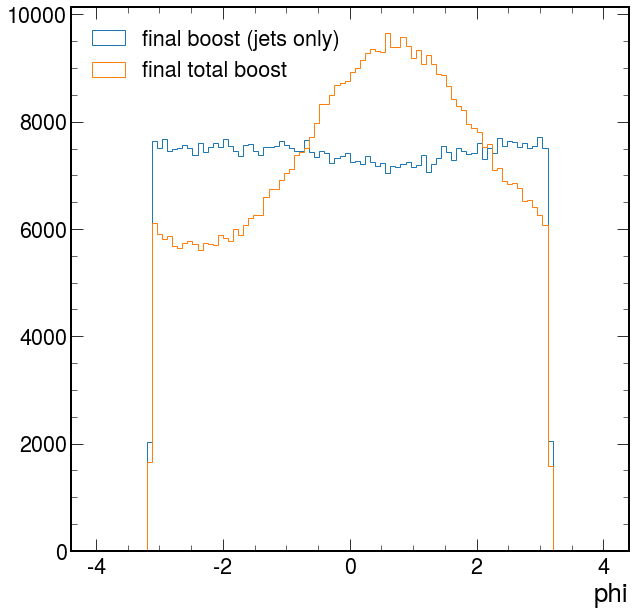

In [63]:
plt.hist(boost_jets.phi, bins=100, label="final boost (jets only)", range=(-4, 4), histtype="step")
plt.hist(boost_reco.phi, bins=100, label="final total boost", range=(-4, 4), histtype="step")
plt.xlabel("phi")
plt.legend(loc="upper left")
plt.show()

# Lepton & MET

In [ ]:
plt.hist(lepton_reco.pt, bins=100, range=(0,350), color="slateblue")
plt.title("lepton pt")
plt.show()
plt.hist(lepton_reco.eta, bins=150, range=(-3, 3), color="seagreen")
plt.title("lepton eta")
plt.show()
plt.hist(lepton_reco.phi, bins=140, range=(-4,4), color="indianred")
plt.title("lepton phi")
plt.show()


In [ ]:
plt.hist(met.pt, bins=100, range=(0,350), color="slateblue")
plt.title("MET pt")
plt.show()
plt.hist(met.phi, bins=140, range=(-1, 1), color="indianred")
plt.title("MET phi")
plt.show()

# Correlation between lepton & MET

In [ ]:
plt.hist(lepton_reco.pt, bins=100, range=(0,400), label="lepton pt", histtype="step")
plt.hist(met.pt, bins=100, range=(0,400), label="met pt", histtype="step")
plt.legend()
plt.show()

plt.hist2d(lepton_reco.pt, met.pt, bins=(100,100), range=[[20, 180], [10, 180]], cmap="inferno")
plt.xlabel("lepton pt"); plt.ylabel("met pt")
plt.show()

# Invariant mass of lepton & MET

In [ ]:
summed_reco = lepton_reco + met
plt.hist(summed_reco.mass, bins=150, range=(0, 400), color="darkorange")
plt.show()

# Correlations between final boost (jets only) and lepton

In [ ]:
plt.hist(boost_jets.pt, bins=100, range=(0,400), label="boost pt", histtype="step")
plt.hist(lepton_reco.pt, bins=100, range=(0,400), label="lepton pt", histtype="step")
plt.legend()
plt.show()

plt.hist2d(boost_jets.pt, lepton_reco.pt, bins=(200,200), range=[[0, 200], [10, 200]], cmap="inferno")
plt.xlabel("boost pt"); plt.ylabel("lepton pt")
plt.show()

In [ ]:
plt.hist(boost_jets.eta, bins=100, range=(-3, 3), label="boost eta", histtype="step")
plt.hist(lepton_reco.eta, bins=100, range=(-3, 3), label="lepton eta", histtype="step")
plt.legend()
plt.show()

plt.hist2d(boost_jets.eta, lepton_reco.eta, bins=(200,200), range=[[-5, 5], [-3, 3]], cmap="inferno")
plt.xlabel("boost eta"); plt.ylabel("lepton eta")
plt.show()

In [ ]:
plt.hist(boost_jets.phi, bins=100, range=(-4, 4), label="boost phi", histtype="step")
plt.hist(lepton_reco.phi, bins=100, range=(-4, 4), label="lepton phi", histtype="step")
plt.legend()
plt.show()

plt.hist2d(boost_jets.phi, lepton_reco.phi, bins=(200,200), cmap="inferno")
plt.xlabel("boost phi"); plt.ylabel("lepton phi")
plt.show()

In [ ]:
plt.hist(boost_jets.px, bins=100, range=(-500, 500), label="boost px", histtype="step")
plt.hist(lepton_reco.px, bins=100, range=(-500, 500), label="lepton px", histtype="step")
plt.legend()
plt.show()

plt.hist2d(boost_jets.px, lepton_reco.px, bins=(200,200), range=[[-300,300], [-200,200]], cmap="inferno")
plt.xlabel("boost px"); plt.ylabel("lepton px")
plt.show()

In [ ]:
plt.hist(boost_jets.py, bins=100, range=(-500, 500), label="boost py", histtype="step")
plt.hist(lepton_reco.py, bins=100, range=(-500, 500), label="lepton py", histtype="step")
plt.legend()
plt.show()

plt.hist2d(boost_jets.py, lepton_reco.py, bins=(200,200), range=[[-300,300], [-200,200]], cmap="inferno")
plt.xlabel("boost py"); plt.ylabel("lepton py")
plt.show()

In [ ]:
plt.hist(boost_jets.pz, bins=100, range=(-1000, 1000), label="boost pz", histtype="step")
plt.hist(lepton_reco.pz, bins=100, range=(-1000, 1000), label="lepton pz", histtype="step")
plt.legend()
plt.show()

plt.hist2d(boost_jets.pz, lepton_reco.pz, bins=(200,200), range=[[-1000,1000], [-200,200]], cmap="inferno")
plt.xlabel("boost pz"); plt.ylabel("lepton pz")
plt.show()

# Correlations between initial energies and total boost

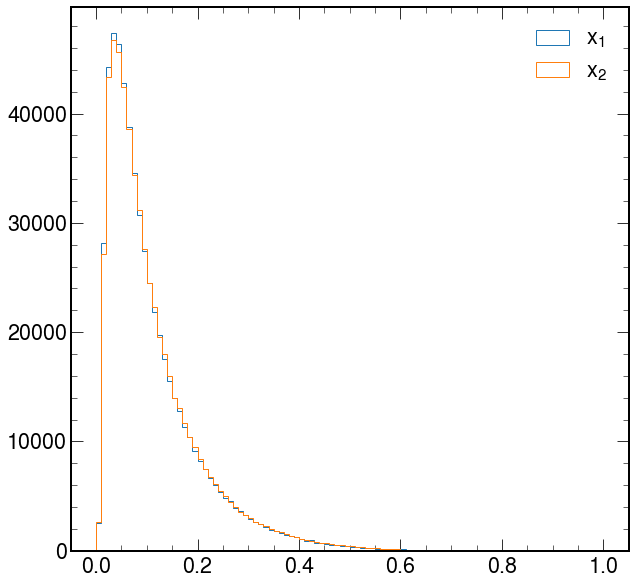

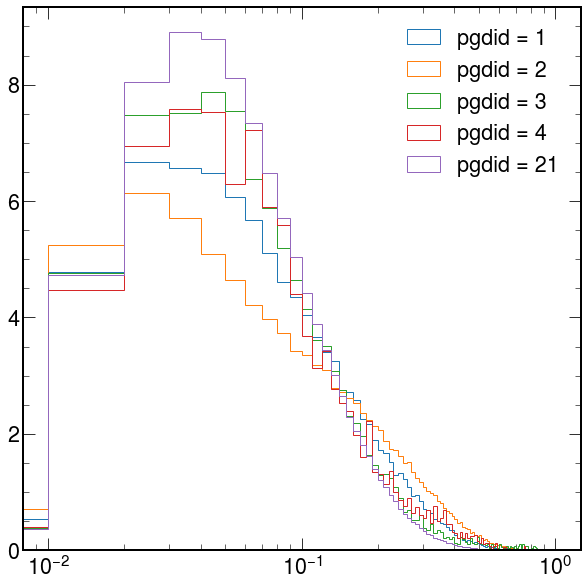

In [14]:
plt.hist(generator_info.x1, bins=100, label=r"$x_1$", range=(0, 1), histtype="step")
plt.hist(generator_info.x2, bins=100, label=r"$x_2$",range=(0, 1), histtype="step")
plt.legend()
plt.show()

for i in range(22):
    energies = generator_info[abs(generator_info.pdgid1) == i].x1
    if len(energies)  > 3000:
        plt.hist(energies, bins=100, label=f"pgdid = {i}", range=(0, 1), histtype="step", density=True)
plt.legend()
plt.xscale("log")
plt.show()


In [11]:
#TASK: Define a 4-vector of the initial energy with pz = 6500*x1 - 6500*x2. Compare it to the total boost in all aspects.

initial_pz = 6500*(generator_info.x1 - generator_info.x2)
initial_E = 6500*(generator_info.x1 + generator_info.x2)

initial_boost = ak.Array(
    {"px": np.zeros_like(initial_pz), "py": np.zeros_like(initial_pz), "pz": initial_pz, "E": initial_E},
    with_name="Momentum4D"
)
initial_boost.type

584143 * Momentum4D["px": float32, "py": float32, "pz": float32, "E": float32]

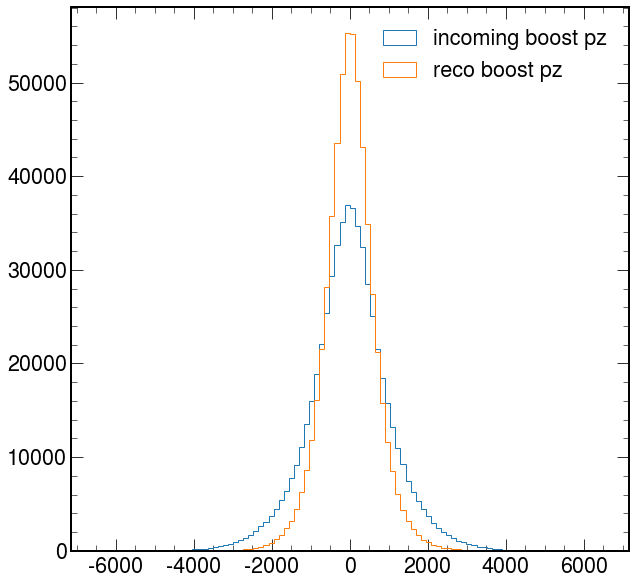

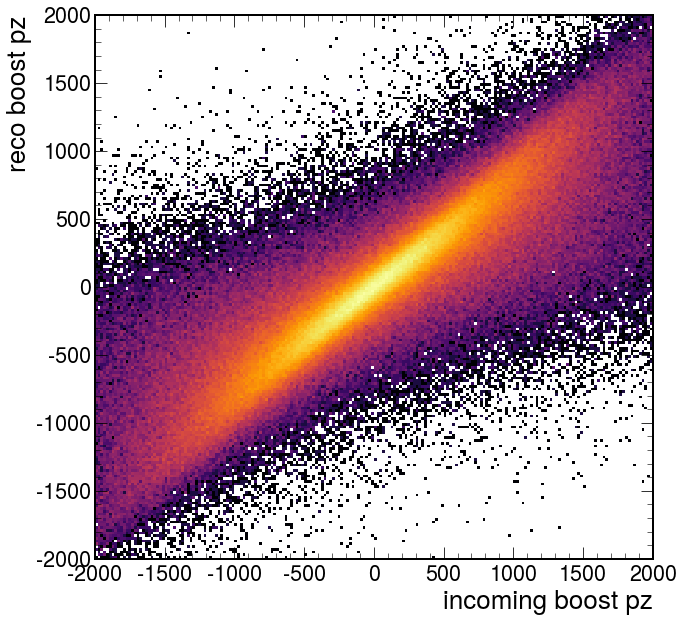

In [15]:
plt.hist(initial_boost.pz, bins=100, range=(-6500, 6500), label="incoming boost pz", histtype="step")
plt.hist(boost_reco.pz, bins=100, range=(-6500, 6500), label="reco boost pz", histtype="step")
plt.legend()
plt.show()

plt.hist2d(initial_boost.pz, boost_reco.pz, bins=(200,200), range=[[-2000,2000], [-2000,2000]], cmap="inferno", norm=LogNorm())
plt.xlabel("incoming boost pz"); plt.ylabel("reco boost pz")
plt.show()

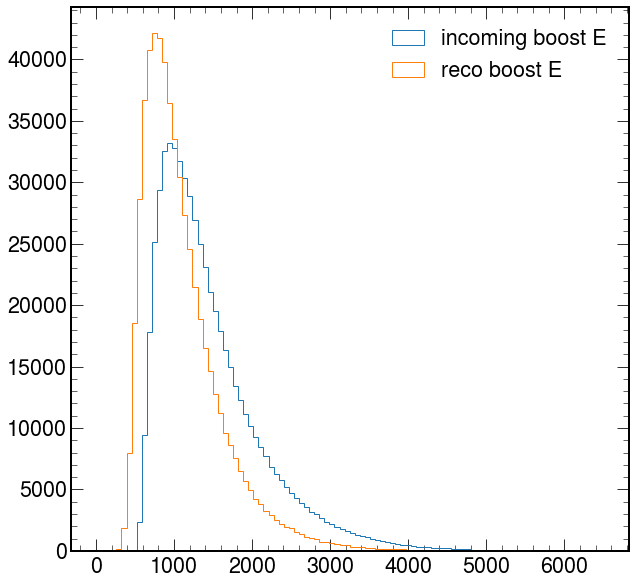

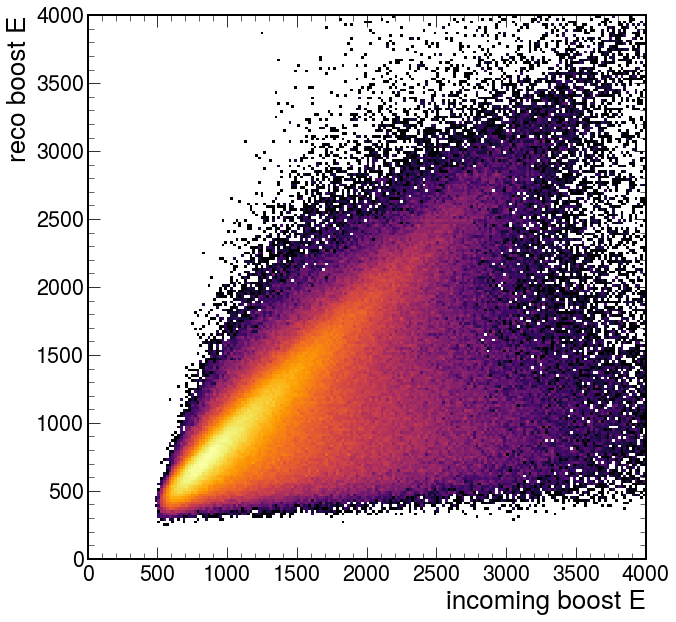

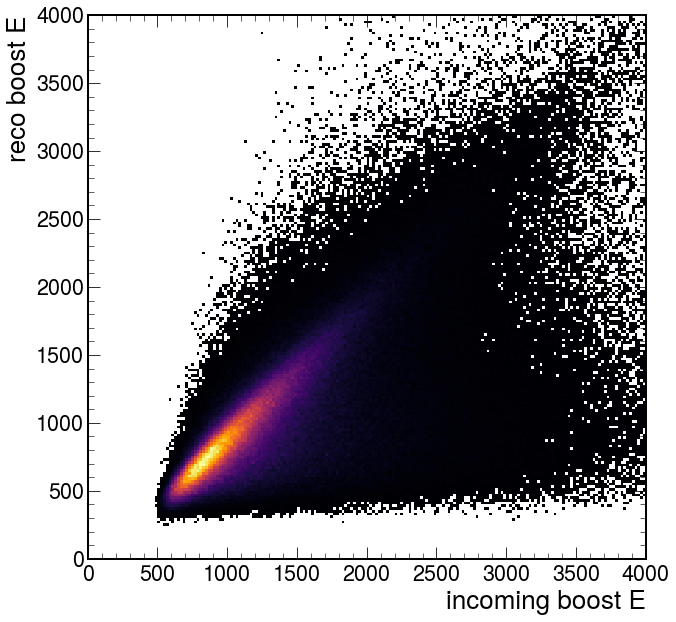

In [21]:
plt.hist(initial_boost.E, bins=100, range=(0, 6500), label="incoming boost E", histtype="step")
plt.hist(boost_reco.E, bins=100, range=(0, 6500), label="reco boost E", histtype="step")
plt.legend()
plt.show()

plt.hist2d(initial_boost.E, boost_reco.E, bins=(200,200), range=[[0,4000], [0,4000]], cmap="inferno", norm=LogNorm())
plt.xlabel("incoming boost E"); plt.ylabel("reco boost E")
plt.show()

plt.hist2d(initial_boost.E, boost_reco.E, bins=(200,200), range=[[0,4000], [0,4000]], cmap="inferno", cmin=1)
plt.xlabel("incoming boost E"); plt.ylabel("reco boost E")
plt.show()

# Correlation between parton boost and final reconstructed boost

In [24]:
#Task: Define total parton sum by adding partons_matched with lepton_partons

#Three boosts to compare: initial_boost, parton_boost, boost_reco
#partons_nogluon = partons[partons.prov != 4]
parton_boost_nolepton = get_vector_sum(partons)
parton_boost_lepton = get_vector_sum(lepton_partons)
parton_boost = parton_boost_nolepton + parton_boost_lepton

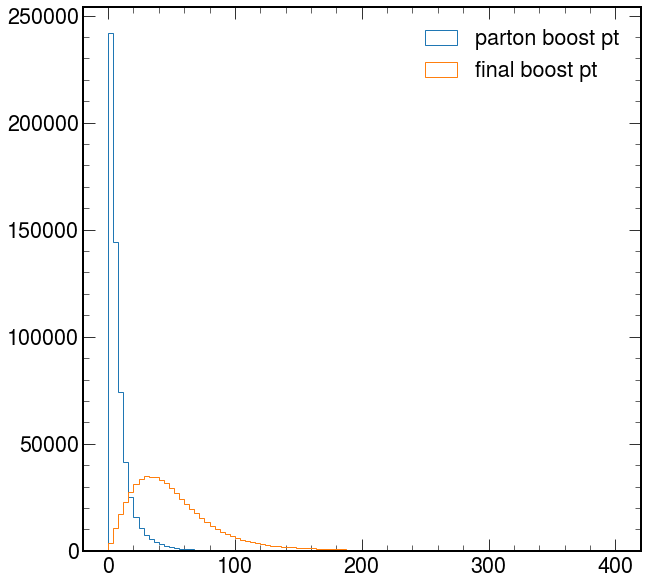

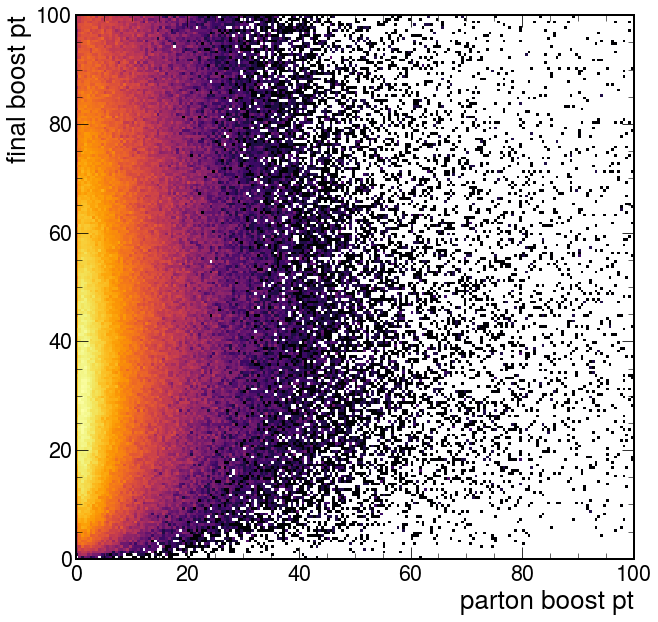

In [25]:
plt.hist(parton_boost.pt, bins=100, range=(0,400), label="parton boost pt", histtype="step")
plt.hist(boost_reco.pt, bins=100, range=(0,400), label="final boost pt", histtype="step")
plt.legend()
plt.show()

plt.hist2d(parton_boost.pt, boost_reco.pt, bins=(200,200), range=[[0, 100], [0, 100]], cmap="inferno", norm=LogNorm())
plt.xlabel("parton boost pt"); plt.ylabel("final boost pt")
plt.show()

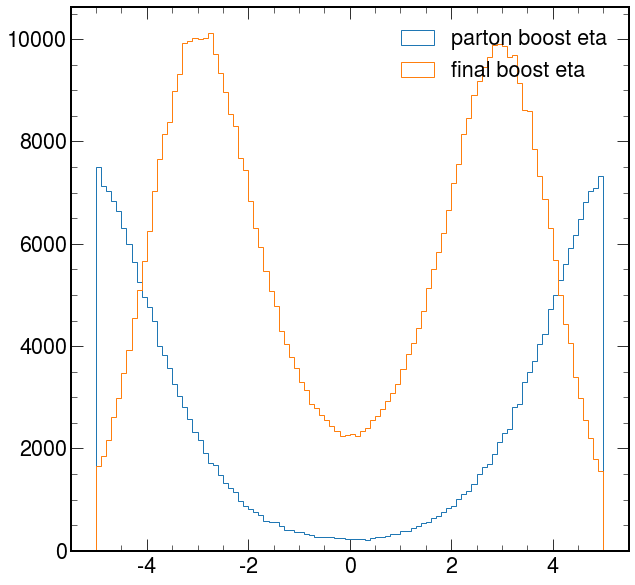

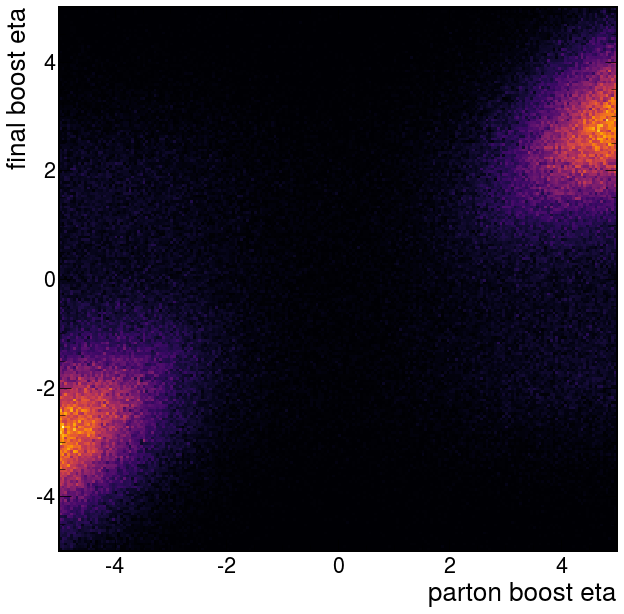

In [26]:
plt.hist(parton_boost.eta, bins=100, range=(-5, 5), label="parton boost eta", histtype="step")
plt.hist(boost_reco.eta, bins=100, range=(-5, 5), label="final boost eta", histtype="step")
plt.legend()
plt.show()

plt.hist2d(parton_boost.eta, boost_reco.eta, bins=(200,200), range=[[-5, 5], [-5, 5]], cmap="inferno")
plt.xlabel("parton boost eta"); plt.ylabel("final boost eta")
plt.show()

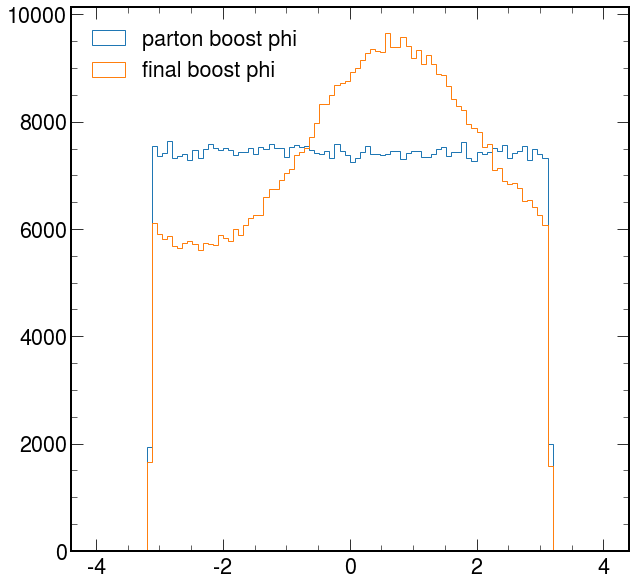

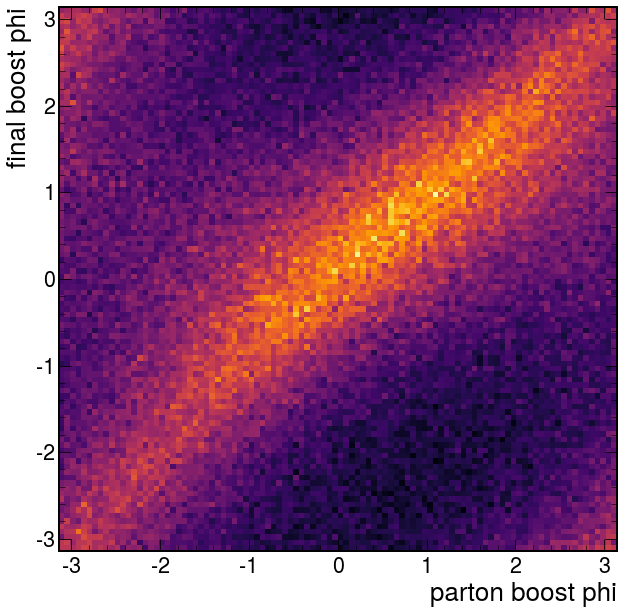

In [27]:
plt.hist(parton_boost.phi, bins=100, range=(-4, 4), label="parton boost phi", histtype="step")
plt.hist(boost_reco.phi, bins=100, range=(-4, 4), label="final boost phi", histtype="step")
plt.legend(loc="upper left")
plt.show()

plt.hist2d(parton_boost.phi, boost_reco.phi, bins=(100,100), cmap="inferno")
plt.xlabel("parton boost phi"); plt.ylabel("final boost phi")
plt.show()

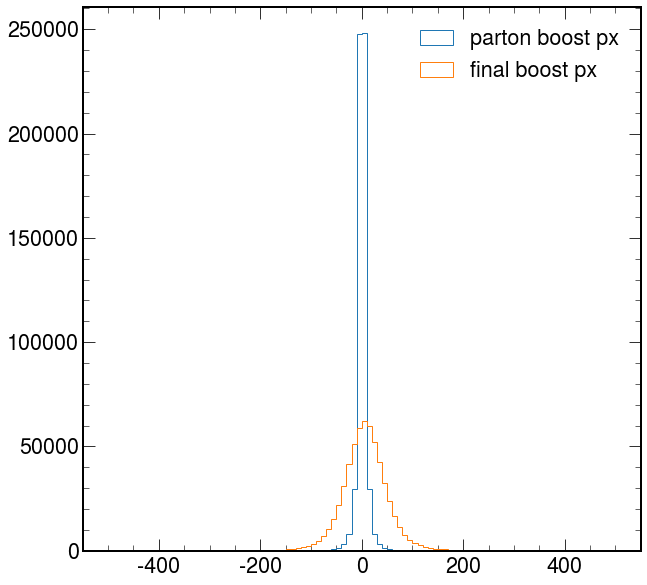

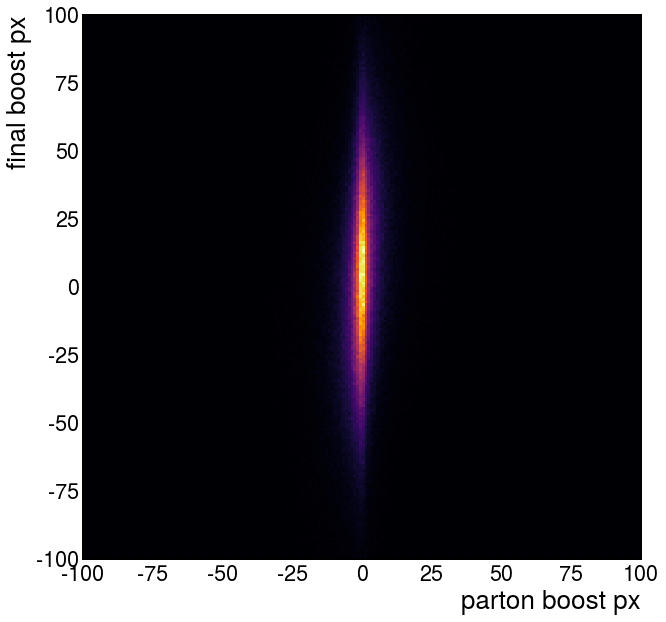

In [28]:
plt.hist(parton_boost.px, bins=100, range=(-500, 500), label="parton boost px", histtype="step")
plt.hist(boost_reco.px, bins=100, range=(-500, 500), label="final boost px", histtype="step")
plt.legend()
plt.show()

plt.hist2d(parton_boost.px, boost_reco.px, bins=(200,200), range=[[-100,100], [-100,100]], cmap="inferno")
plt.xlabel("parton boost px"); plt.ylabel("final boost px")
plt.show()

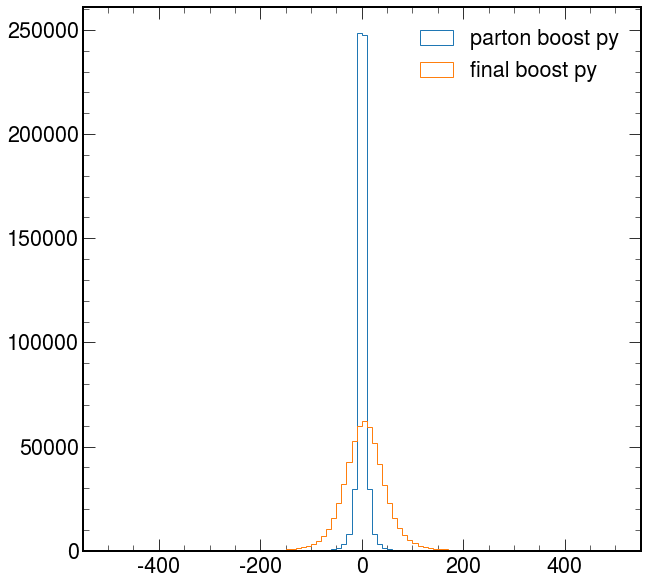

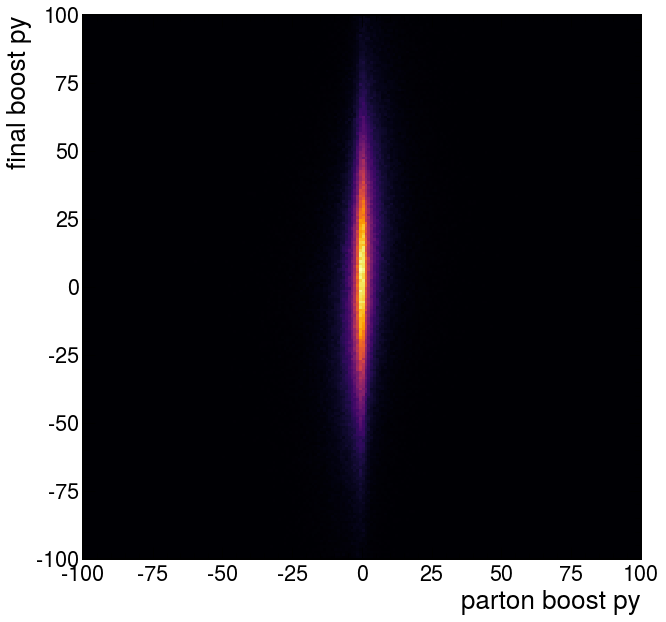

In [29]:
plt.hist(parton_boost.py, bins=100, range=(-500, 500), label="parton boost py", histtype="step")
plt.hist(boost_reco.py, bins=100, range=(-500, 500), label="final boost py", histtype="step")
plt.legend()
plt.show()

plt.hist2d(parton_boost.py, boost_reco.py, bins=(200,200), range=[[-100,100], [-100,100]], cmap="inferno")
plt.xlabel("parton boost py"); plt.ylabel("final boost py")
plt.show()

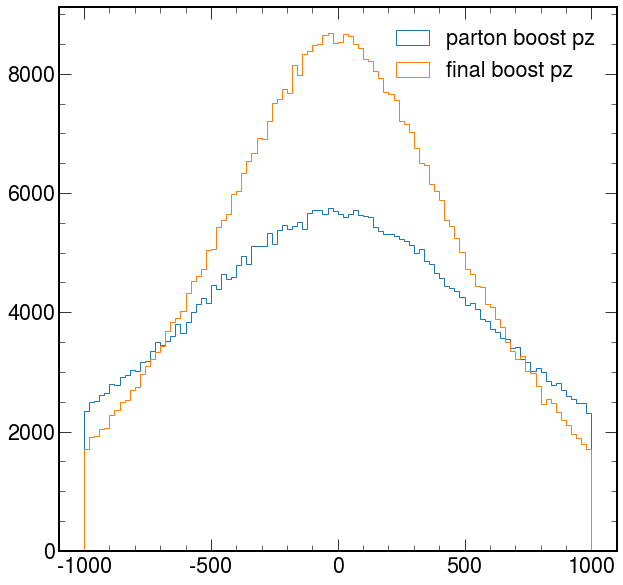

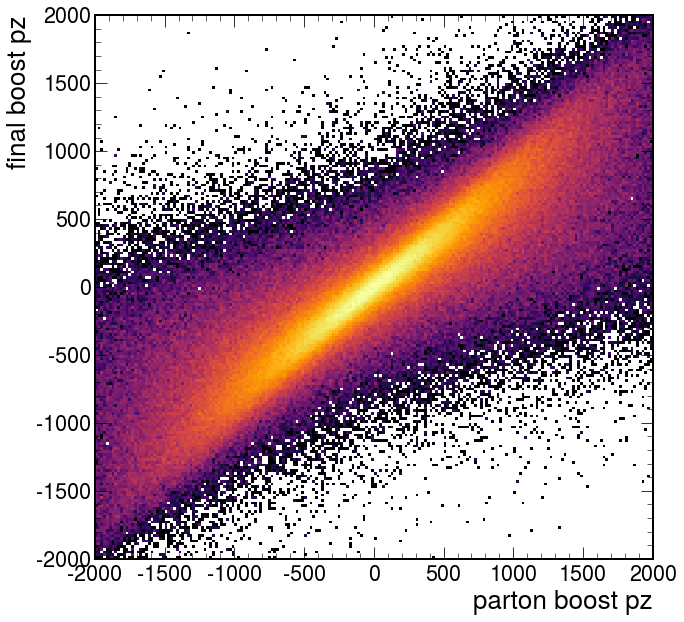

In [30]:
plt.hist(parton_boost.pz, bins=100, range=(-1000, 1000), label="parton boost pz", histtype="step")
plt.hist(boost_reco.pz, bins=100, range=(-1000, 1000), label="final boost pz", histtype="step")
plt.legend()
plt.show()

plt.hist2d(parton_boost.pz, boost_reco.pz, bins=(200,200), range=[[-2000,2000], [-2000,2000]], cmap="inferno", norm=LogNorm())
plt.xlabel("parton boost pz"); plt.ylabel("final boost pz")
plt.show()

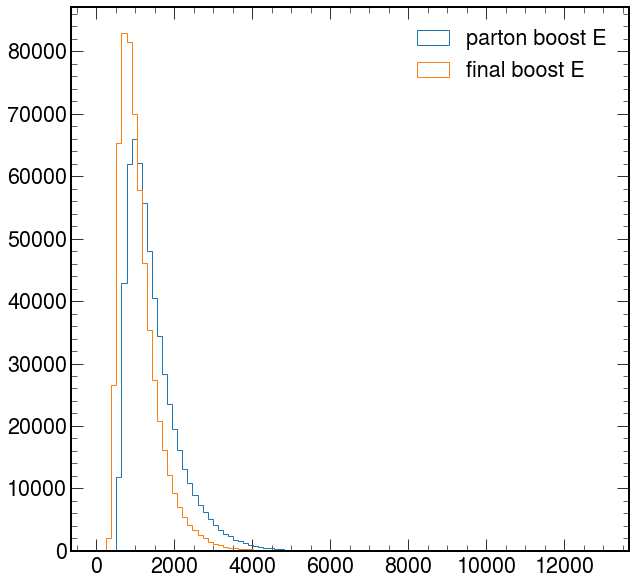

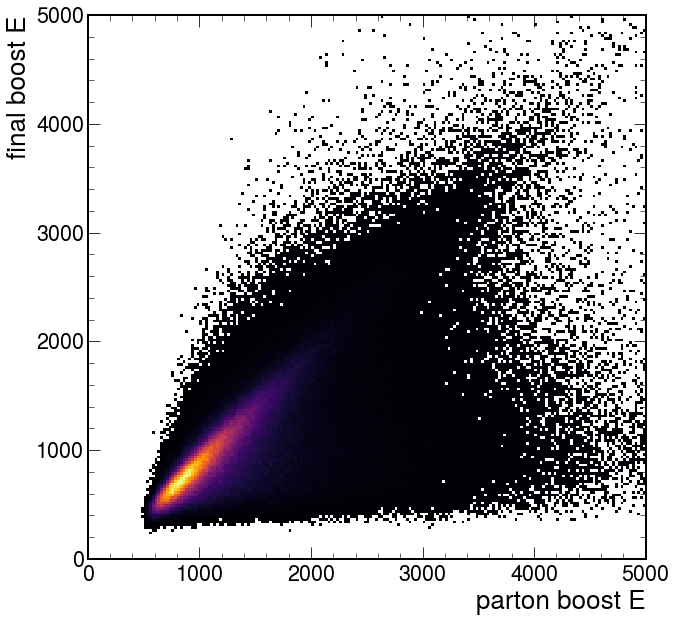

In [31]:
plt.hist(parton_boost.E, bins=100, range=(0, 13000), label="parton boost E", histtype="step")
plt.hist(boost_reco.E, bins=100, range=(0, 13000), label="final boost E", histtype="step")
plt.legend()
plt.show()

plt.hist2d(parton_boost.E, boost_reco.E, bins=(200,200), range=[[0,5000], [0,5000]], cmap="inferno", cmin=1)
plt.xlabel("parton boost E"); plt.ylabel("final boost E")
plt.show()

# Correlation between initial generator boost and parton boost

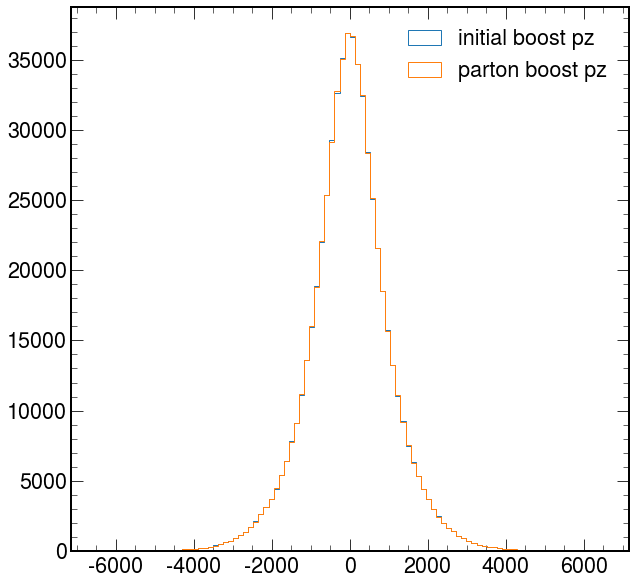

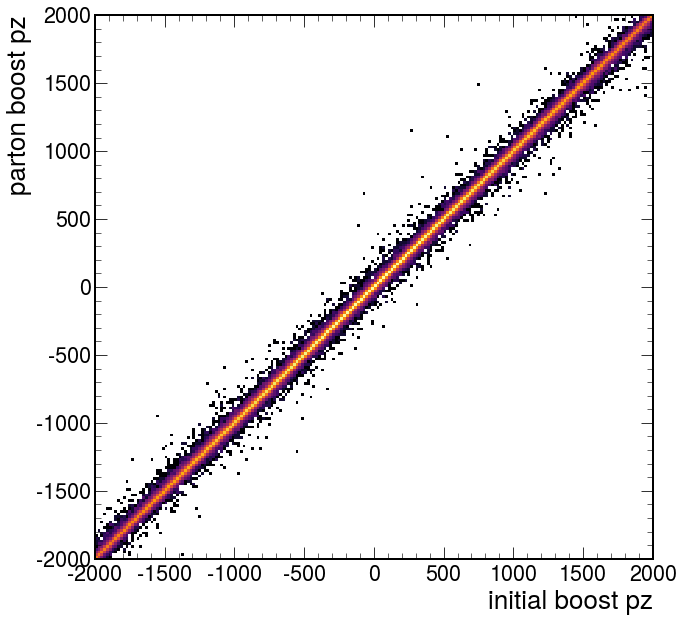

In [34]:
plt.hist(initial_boost.pz, bins=100, range=(-6500, 6500), label="initial boost pz", histtype="step")
plt.hist(parton_boost.pz, bins=100, range=(-6500, 6500), label="parton boost pz", histtype="step")
plt.legend()
plt.show()

plt.hist2d(initial_boost.pz, parton_boost.pz, bins=(200,200), range=[[-2000,2000], [-2000,2000]], cmap="inferno", norm=LogNorm())
plt.xlabel("initial boost pz"); plt.ylabel("parton boost pz")
plt.show()

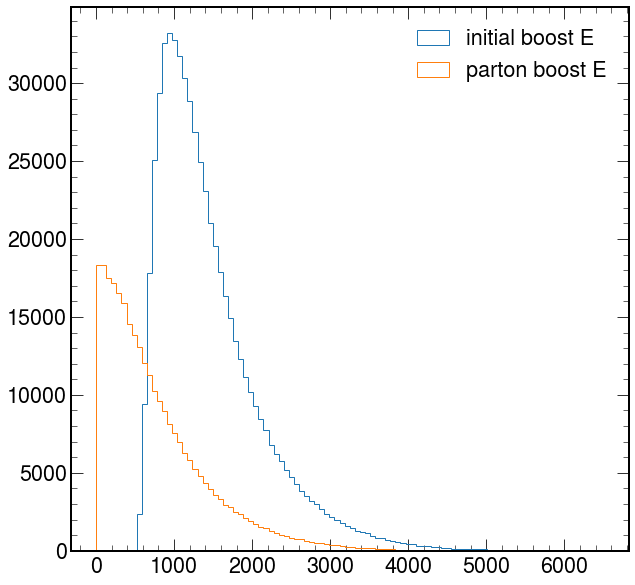

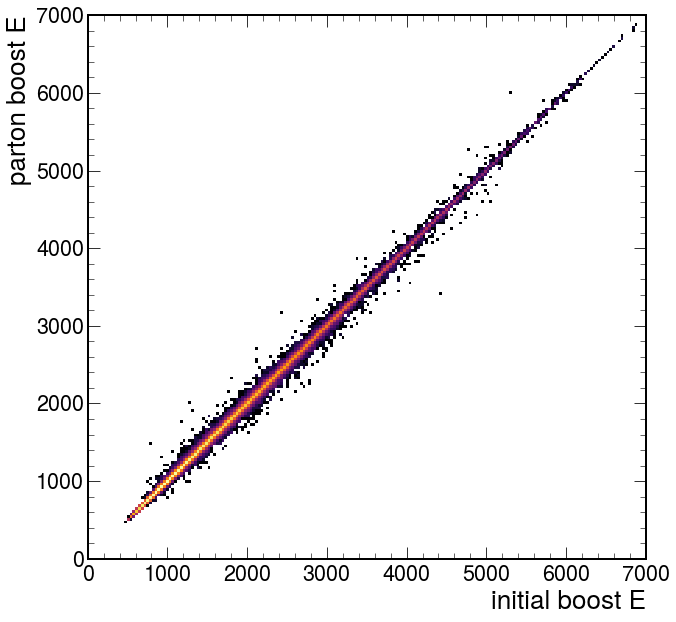

In [37]:
plt.hist(initial_boost.E, bins=100, range=(0, 6500), label="initial boost E", histtype="step")
plt.hist(parton_boost.pz, bins=100, range=(0, 6500), label="parton boost E", histtype="step")
plt.legend()
plt.show()

plt.hist2d(initial_boost.E, parton_boost.E, bins=(200,200), range=[[0,7000], [0,7000]], cmap="inferno", norm=LogNorm())
plt.xlabel("initial boost E"); plt.ylabel("parton boost E")
plt.show()